In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [11]:
class Bandit :
    def __init__(self, p) :
        #p : actual win rates
        self.p = p
        self.p_estimate = 0.
        self.N = 0
    
    def pull(self) :
        #draws a 1 with probabilty p
        return np.random.random() < self.p
    
    def update(self, x) :
        self.N +=1 
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N
        
def ucb(mean, N, nj) :
    '''
    Returns a value that we want to be greedy with respect to
    ----------
    
    Parameters
    ----------
    mean : float
    mean of samples explored for the bandit
    
    N : int
    total number of plays made so far
    
    nj : int
    total number of times we played the particular bandit
    '''
    assert N > 0
    assert nj > 0
    return (mean + np.sqrt(2 * np.log(N) / nj))

def experiment() :
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.zeros(NUM_TRIALS)
    total_plays = 0
    
    #initialization of each bandit once
    for j in range(len(bandits)) :
        x = bandits[j].pull()
        bandits[j].update(x)
        rewards[j] = x
    
    for i in range(len(bandits), NUM_TRIALS) :
        j = np.argmax([ucb(b.p_estimate, i, b.N) for b in bandits])
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)
        
        rewards[i] = x
        
    for b in bandits:
        print(f'Mean estimate : {b.p_estimate}')
        
    print(f'Total reward : {rewards.sum()}')
    print(f'Overall win rate : {(rewards.sum() / NUM_TRIALS)}')
    print(f'num of times selected each bandit : {[b.N for b in bandits]}')
    
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.xscale('log')
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.show()

Mean estimate : 0.19444444444444442
Mean estimate : 0.513440860215054
Mean estimate : 0.7486339346699392
Total reward : 74736.0
Overall win rate : 0.74736
num of times selected each bandit : [72, 372, 99556]


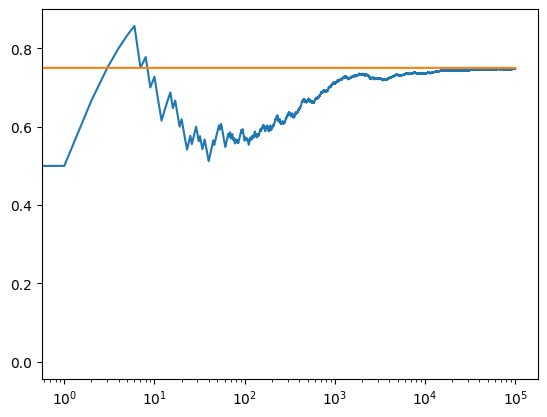

In [12]:
if __name__ == '__main__' :
    experiment()